In [1]:
import pandas as pd
from PIL import Image
import os
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc, roc_auc_score
import torch
import numpy as np
from torchmetrics.classification import BinaryAUROC
from classification import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/nhattm/.conda/envs/isic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fold =1
df_data = pd.read_csv("./dataset/data_images.csv")
# get dataframe train and test
df_train = df_data[df_data["fold"] != fold].reset_index(drop=True)
df_test = df_data[df_data["fold"] == fold].reset_index(drop=True)
train_loader = ISIC_Loader(df_train)
test_loader = ISIC_Loader(df_test)
# Define data loaders for the training and test data
train_dataset = DataLoader(
    train_loader,
    batch_size=cfg.TRAIN.BATCH_SIZE,
    pin_memory=True,
    shuffle=True,
    num_workers=cfg.TRAIN.NUM_WORKERS,
    drop_last=True,
    prefetch_factor=cfg.TRAIN.PREFETCH_FACTOR,
)
test_dataset = DataLoader(
    test_loader,
    batch_size=cfg.TRAIN.BATCH_SIZE,
    num_workers=cfg.TRAIN.NUM_WORKERS,
    prefetch_factor=cfg.TRAIN.PREFETCH_FACTOR,
        )
model = convnext_small(
    pretrained=cfg.TRAIN.PRETRAIN,
    in_22k=cfg.TRAIN.CONVEXT.IN22K,
    in_chans=cfg.DATA.IN_CHANNEL,
    num_classes=cfg.DATA.NUM_CLASS,
    drop_path_rate=cfg.TRAIN.CONVEXT.DROPOUT,
)
classifier = Classifier(
    model,
    cfg.DATA.CLASS_WEIGHT,
    cfg.DATA.NUM_CLASS,
    cfg.OPT.LEARNING_RATE,
    cfg.OPT.FACTOR_LR,
    cfg.OPT.PATIENCE_LR,
)

In [11]:
image, label = next(iter(train_dataset))
image = image.to(device)
classifier.eval()
classifier = classifier.to(device)

In [18]:
y_pred1 = classifier(image).detach().cpu()[:, 1:2]
y_pred2 = classifier(image).detach().cpu()[:, 1:2]

In [27]:
y_pred = torch.cat((y_pred1, y_pred2), 0)
y_true = torch.cat((label, label), 0)

In [28]:
y_true.shape

torch.Size([4, 1])

In [25]:
y_pred.shape

torch.Size([4, 1])

In [29]:
partial_auc(y_pred, label)

tensor(-0.1600)

In [12]:
label.shape

torch.Size([2])

In [8]:
y_pred = classifier(image).detach().cpu()

f1_score_batch(label, y_pred)

tensor(9.9990e-05)

In [16]:
np.asarray(y_pred.detach().cpu()[:, 1])

array([0.42101938, 0.6100592 ], dtype=float32)

In [70]:
label.shape

torch.Size([2])

In [31]:
target = np.array([0, 1, 1, 0])
preds = np.array([0, 0.5, 0.7, 0.8])

In [33]:
partial_auc1(target, preds)

np.float64(0.09999999999999996)

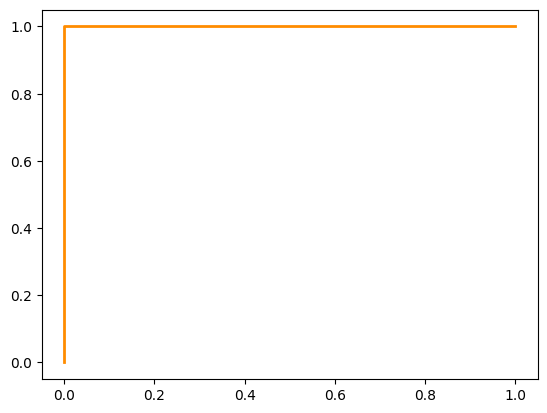

In [10]:
#draw ROC curve
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
# use plt to draw
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

In [9]:
tpr

array([0., 1., 1.])

In [8]:
fpr

array([0., 0., 1.])